In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 1. Load Model

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
clf = joblib.load('RandomForest (AllFeatures).pkl') 

# 2. Create a dataframe to store the OOB Score

In [4]:
df_features = pd.DataFrame(columns=['Name', 'OOB'])
df_features.set_index('Name', inplace=True)
df_features.head()

,OOB
Name,


In [5]:
for feature in zip(X_train_resampled.columns.values, clf.feature_importances_):
    print(feature)
    df_features.at[feature[0]] = feature[1]

('V1', 0.004165390231353254)
('V2', 0.020482484767376494)
('V3', 0.04207767099558187)
('V4', 0.0343054729025963)
('V5', 0.004874163972715143)
('V6', 0.021398392999385927)
('V7', 0.04794911215261953)
('V8', 0.005656534290705265)
('V9', 0.019569353183267107)
('V10', 0.17257467592831208)
('V11', 0.07824649397302016)
('V12', 0.02999812613323503)
('V13', 0.004915594356467597)
('V14', 0.16411775443855106)
('V15', 0.006145097213243895)
('V16', 0.044537965962740046)
('V17', 0.2216598620420121)
('V18', 0.005082150263896788)
('V19', 0.008594976952459105)
('V20', 0.008029193846248315)
('V21', 0.007924755558342746)
('V22', 0.0045663092153568055)
('V23', 0.006655538826654898)
('V24', 0.0032526308572354734)
('V25', 0.0034862375692387136)
('V26', 0.005922749885598723)
('V27', 0.007180288935976575)
('V28', 0.0034466778251129432)
('Scaled_Amount', 0.00839827384960983)
('Scaled_Time', 0.004786070871086185)


# 3. Sort in descending order (OOB Score)

In [6]:
df_features.sort_values("OOB", axis=0, ascending=False, inplace=True)
df_features.head()

,OOB
Name,
V17,0.22166
V10,0.172575
V14,0.164118
V11,0.0782465
V7,0.0479491


# 4. Visualize OOB Score

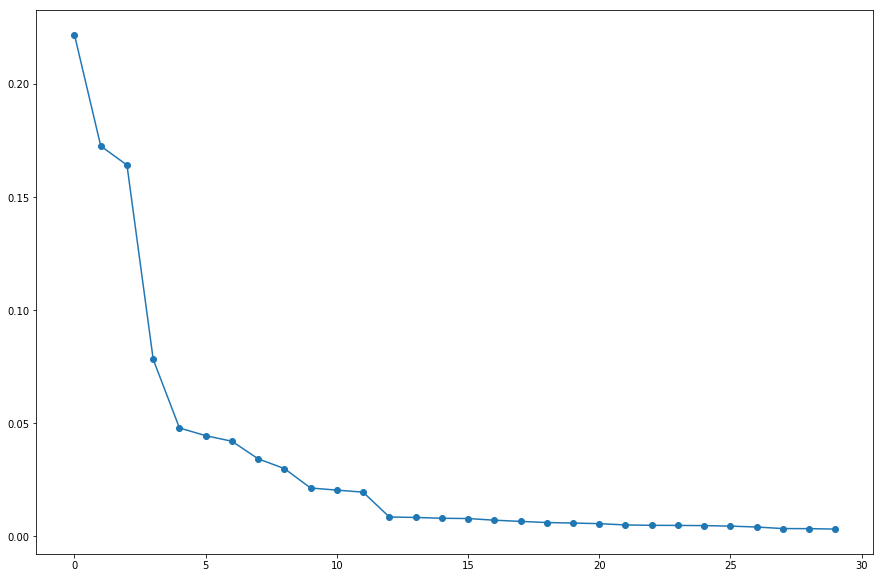

In [7]:
plt.figure(figsize = (15,10))
plt.plot(df_features['OOB'].values, "o-")
plt.show()

# 5. Choose the features and save in a csv file

In [8]:
df_features.to_csv("Random Forest (AllFeatures - OOB).csv")


In [9]:
df_features[:9].to_csv("Random Forest (AllFeatures - OOB - 9).csv")


df_features[:12].to_csv("Random Forest (AllFeatures - OOB - 12).csv")
